### Demographic Analysis

#### Datasets
US Census Demographic Data - https://www.kaggle.com/muonneutrino/us-census-demographic-data

Map - https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2017.html

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from shapely.geometry import Point, Polygon

#### Reading census dataset

In [2]:
# Reading dataset with census data from 2017
path = '../Data/demographics/US Census Demographic Data/acs2017_census_tract_data.csv'
df_census = pd.read_csv(path)

In [3]:
# Filter dataset to keep data from Broward and Miami-Dade counties
df_filtered = df_census[df_census['County'].isin(['Broward County', 'Miami-Dade County'])]
total = str(len(df_filtered.index)); print("Total entries: " + total)
df_filtered[:5]

Total entries: 881


TractId    State          County  TotalPop   Men  Women  Hispanic  \
14318  12011010102  Florida  Broward County      2967  1531   1436      11.4   
14319  12011010103  Florida  Broward County      3048  1484   1564       9.3   
14320  12011010104  Florida  Broward County      2153  1287    866       7.5   
14321  12011010200  Florida  Broward County      6229  3020   3209      15.1   
14322  12011010304  Florida  Broward County      4341  2032   2309      15.6   

       White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  \
14318   85.5    0.0     0.0  ...   4.0          1.5        11.7         24.9   
14319   86.8    2.2     0.0  ...   4.5          2.8         2.8         22.5   
14320   86.8    3.7     0.0  ...   3.4         11.8        15.2         24.0   
14321   64.5    6.5     0.2  ...   1.4          1.2         3.4         26.6   
14322    8.5   68.2     0.0  ...   3.3          6.5         0.2         25.4   

       Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
14318      1583         81.6        11.7           6.7         0.0   
14319      1704         89.0         8.2           2.8         0.0   
14320       974         76.8         9.1          14.1         0.0   
14321      3335         83.7         9.8           6.5         0.0   
14322      1826         84.4         8.5           7.1         0.0   

       Unemployment  
14318           4.1  
14319           5.4  
14320           2.9  
14321           8.0  
14322          15.5  

[5 rows x 37 columns]

#### Loading the shape files

In [4]:
map_path = f'zip://../Data/maps/census_tract/cb_2017_12_tract_500k.zip'
map_df = gpd.read_file(map_path)
map_df = map_df.rename(columns={'GEOID':'TractId'})
map_df.crs

{'init': 'epsg:4269'}

In [5]:
map_df = map_df.to_crs({'init': 'epsg:4326'})
map_df.crs

{'init': 'epsg:4326'}

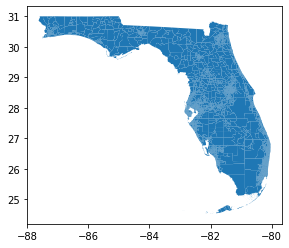

In [6]:
map_df.plot()

In [7]:
map_df['TractId'] = map_df['TractId'].astype('int64')
map_df[:5]

STATEFP COUNTYFP TRACTCE              AFFGEOID      TractId   NAME LSAD  \
0      12      001  000808  1400000US12001000808  12001000808   8.08   CT   
1      12      001  001520  1400000US12001001520  12001001520  15.20   CT   
2      12      001  002205  1400000US12001002205  12001002205  22.05   CT   
3      12      005  000805  1400000US12005000805  12005000805   8.05   CT   
4      12      005  001200  1400000US12005001200  12005001200     12   CT   

      ALAND  AWATER                                           geometry  
0   2631240  188598  POLYGON ((-82.34001 29.62057, -82.33988 29.621...  
1   1485239    1715  POLYGON ((-82.39142 29.64007, -82.38582 29.642...  
2  25057695    1319  POLYGON ((-82.47305 29.56782, -82.47293 29.586...  
3   3428366  418406  POLYGON ((-85.59126 30.13472, -85.59110 30.145...  
4   6828735    9768  POLYGON ((-85.64686 30.18484, -85.64421 30.186...

In [8]:
#Filtering
sfmap = map_df[map_df['COUNTYFP'].isin(['011', '086'])] # Broward: 011 and Miami-Dade: 086

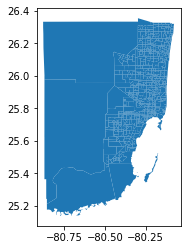

In [9]:
sfmap.plot()

In [10]:
df_filtered.columns

Index(['TractId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [11]:
# take the columns that we care about to perform the join
demograph = df_filtered[['TractId', 'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'ChildPoverty', 'MeanCommute', 'Unemployment']]
demograph[:5]

TractId  TotalPop   Income  IncomePerCap  Poverty  ChildPoverty  \
14318  12011010102      2967  67667.0       45530.0      9.0           4.3   
14319  12011010103      3048  70833.0       59608.0     11.9          32.2   
14320  12011010104      2153  60068.0       55854.0     11.8          19.4   
14321  12011010200      6229  44611.0       22670.0     19.4          22.6   
14322  12011010304      4341  37969.0       15218.0     21.5          26.9   

       MeanCommute  Unemployment  
14318         24.9           4.1  
14319         22.5           5.4  
14320         24.0           2.9  
14321         26.6           8.0  
14322         25.4          15.5

In [12]:
# join geodataframe with demographic data
merged = sfmap.set_index('TractId').join(demograph.set_index('TractId'))
merged[:5]

STATEFP COUNTYFP TRACTCE              AFFGEOID    NAME LSAD  \
TractId                                                                   
12011010307      12      011  010307  1400000US12011010307  103.07   CT   
12011010603      12      011  010603  1400000US12011010603  106.03   CT   
12011010902      12      011  010902  1400000US12011010902  109.02   CT   
12011020211      12      011  020211  1400000US12011020211  202.11   CT   
12011020404      12      011  020404  1400000US12011020404  204.04   CT   

               ALAND  AWATER  \
TractId                        
12011010307  3057012   14366   
12011010603  2844812  102166   
12011010902  1386600   50411   
12011020211   964522       0   
12011020404  2221063   58481   

                                                      geometry  TotalPop  \
TractId                                                                    
12011010307  POLYGON ((-80.12833 26.32768, -80.12814 26.327...      4096   
12011010603  POLYGON ((-80.26900 26.29673, -80.26805 26.298...      5651   
12011010902  POLYGON ((-80.09518 26.29166, -80.09389 26.291...      2868   
12011020211  POLYGON ((-80.23380 26.23552, -80.22180 26.235...      2639   
12011020404  POLYGON ((-80.22059 26.22250, -80.21828 26.222...      8620   

              Income  IncomePerCap  Poverty  ChildPoverty  MeanCommute  \
TractId                                                                  
12011010307  30625.0       16905.0     26.3          47.2         21.3   
12011010603  99234.0       39334.0      8.2          13.2         31.6   
12011010902  63962.0       48500.0      4.4           0.0         23.6   
12011020211  36959.0       24614.0     14.9          36.4         25.4   
12011020404  52203.0       18603.0     11.8          16.7         27.3   

             Unemployment  
TractId                    
12011010307          10.6  
12011010603           5.5  
12011010902           3.9  
12011020211          12.1  
12011020404           6.5

In [13]:
sorted_ = merged.sort_values('ALAND', ascending = False)
sorted_[:5]

STATEFP COUNTYFP TRACTCE              AFFGEOID    NAME LSAD  \
TractId                                                                   
12086011500      12      086  011500  1400000US12086011500     115   CT   
12011980000      12      011  980000  1400000US12011980000    9800   CT   
12086011404      12      086  011404  1400000US12086011404  114.04   CT   
12086011401      12      086  011401  1400000US12086011401  114.01   CT   
12086014000      12      086  014000  1400000US12086014000     140   CT   

                  ALAND    AWATER  \
TractId                             
12086011500  2406752300  51530596   
12011980000  2066664695   1295079   
12086011404   864515171  69193155   
12086011401   231339651  77422573   
12086014000   117140244  16285916   

                                                      geometry  TotalPop  \
TractId                                                                    
12086011500  POLYGON ((-80.87315 25.66618, -80.87313 25.760...      7290   
12011980000  POLYGON ((-80.88123 26.33381, -80.53990 26.334...         0   
12086011404  MULTIPOLYGON (((-80.62479 25.18281, -80.62289 ...      9365   
12086011401  MULTIPOLYGON (((-80.30352 25.38012, -80.30162 ...     18678   
12086014000  POLYGON ((-80.48661 25.89242, -80.45382 25.927...       186   

              Income  IncomePerCap  Poverty  ChildPoverty  MeanCommute  \
TractId                                                                  
12086011500  71692.0       24950.0      7.1           4.4         39.4   
12011980000      NaN           NaN      NaN           NaN          NaN   
12086011404  26498.0        6461.0     50.2          66.7         35.9   
12086011401  50812.0       20865.0     18.0          26.6         32.3   
12086014000  71250.0       22972.0     18.3          30.7         22.8   

             Unemployment  
TractId                    
12086011500           6.1  
12011980000           NaN  
12086011404          15.0  
12086011401           9.4  
12086014000           0.0

In [14]:
#Removing the tract with larger land area. These correspond to the Everglades and are not our interest
merged_main = merged.drop([12086011500, 12011980000, 12086011404, 12086011401])
merged_main[:3]

STATEFP COUNTYFP TRACTCE              AFFGEOID    NAME LSAD  \
TractId                                                                   
12011010307      12      011  010307  1400000US12011010307  103.07   CT   
12011010603      12      011  010603  1400000US12011010603  106.03   CT   
12011010902      12      011  010902  1400000US12011010902  109.02   CT   

               ALAND  AWATER  \
TractId                        
12011010307  3057012   14366   
12011010603  2844812  102166   
12011010902  1386600   50411   

                                                      geometry  TotalPop  \
TractId                                                                    
12011010307  POLYGON ((-80.12833 26.32768, -80.12814 26.327...      4096   
12011010603  POLYGON ((-80.26900 26.29673, -80.26805 26.298...      5651   
12011010902  POLYGON ((-80.09518 26.29166, -80.09389 26.291...      2868   

              Income  IncomePerCap  Poverty  ChildPoverty  MeanCommute  \
TractId                                                                  
12011010307  30625.0       16905.0     26.3          47.2         21.3   
12011010603  99234.0       39334.0      8.2          13.2         31.6   
12011010902  63962.0       48500.0      4.4           0.0         23.6   

             Unemployment  
TractId                    
12011010307          10.6  
12011010603           5.5  
12011010902           3.9

### Ploting the data on the map

In [15]:
# helper functions

def heatmap(variable, map_df, title='', cmap='Blues', figsize=(10,6)):
    """ 
    Display a heatmap for the provided virable.
  
    Parameters: 
    variable (str): The name of the variable (column) in the map dataframe for which you want to display the heatmap.
    map_df (geopandas data frame): Map dataframe created using geopandas. 
    title (str): Optional title for the chart.
    cmap (str): Color for the heatmap
    figsize ((int,int)): Size of the figure.
    """
    
    # chloropleth range
    vmin, vmax = min(map_df[variable]), max(map_df[variable])
    
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=figsize)
    
    # create map
    map_df.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')
    
    # remove the axis
    ax.axis('off')

    # add a title
    ax.set_title(title, \
                  fontdict={'fontsize': '25',
                            'fontweight' : '3'})


    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm, orientation='horizontal', pad = 0, shrink = 0.40)

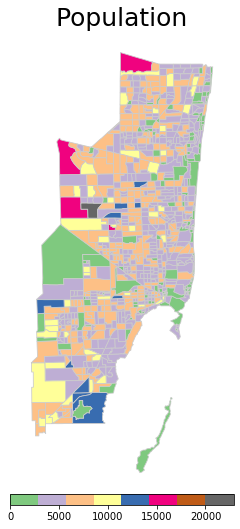

In [21]:
heatmap('TotalPop', merged_main, title='Population', cmap = 'Accent', figsize=(10, 10))


C:\Users\miguelb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


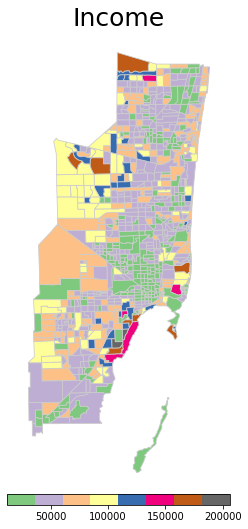

In [22]:
heatmap('Income', merged_main, title='Income', cmap = 'Accent', figsize=(10, 10))

C:\Users\miguelb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


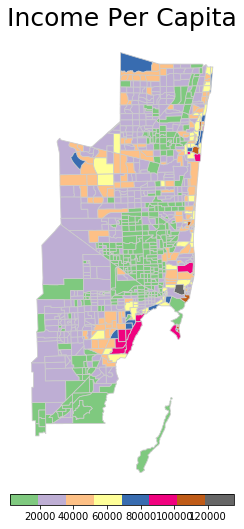

In [23]:
heatmap('IncomePerCap', merged_main, title='Income Per Capita', cmap = 'Accent', figsize=(10, 10))

C:\Users\miguelb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


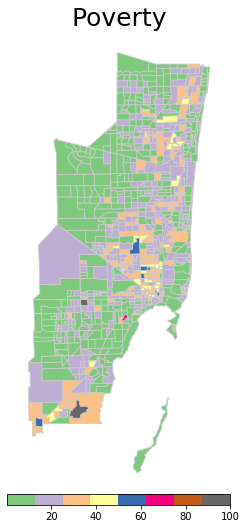

In [25]:
heatmap('Poverty', merged_main, title='Poverty', cmap = 'Accent', figsize=(10, 10))

C:\Users\miguelb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


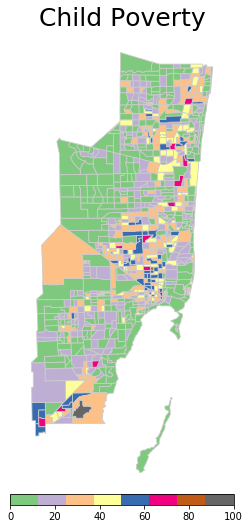

In [26]:
heatmap('ChildPoverty', merged_main, title='Child Poverty', cmap = 'Accent', figsize=(10, 10))

C:\Users\miguelb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


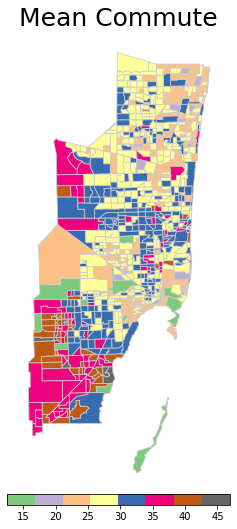

In [27]:
heatmap('MeanCommute', merged_main, title='Mean Commute', cmap = 'Accent', figsize=(10, 10))

C:\Users\miguelb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


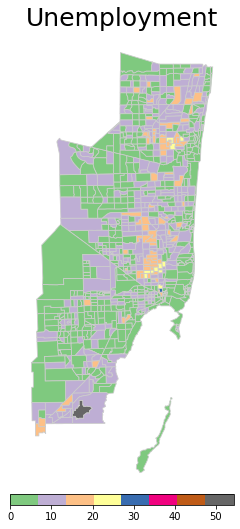

In [28]:
heatmap('Unemployment', merged_main, title='Unemployment', cmap = 'Accent', figsize=(10, 10))